In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import seaborn as sns
import torch
from copy import deepcopy
from helper import *

In [3]:
arrfp32 = torch.rand((4, 4), dtype=torch.float32)
arrfp16 = torch.tensor(arrfp32, dtype=torch.float16)
arrbf16 = torch.tensor(arrfp32, dtype=torch.bfloat16)
arrint8 = torch.tensor(arrfp32, dtype=torch.int8)

/tmp/ipykernel_214238/2587310950.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  arrfp16 = torch.tensor(arrfp32, dtype=torch.float16)
/tmp/ipykernel_214238/2587310950.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  arrbf16 = torch.tensor(arrfp32, dtype=torch.bfloat16)
/tmp/ipykernel_214238/2587310950.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  arrint8 = torch.tensor(arrfp32, dtype=torch.int8)


In [4]:
# print size of arrfp32 in bytes
print(f"Size of arrfp32 {torch.finfo(torch.float32).bits*arrfp32.numel()/8} bytes")
# print size of arrfp16 in bytes
print(f"Size of arrfp16 {torch.finfo(torch.float16).bits*arrfp16.numel()/8} bytes")
# print size of arrbf16 in bytes
print(f"Size of arrbf16 {torch.finfo(torch.bfloat16).bits*arrbf16.numel()/8} bytes")

Size of arrfp32 64.0 bytes
Size of arrfp16 32.0 bytes
Size of arrbf16 32.0 bytes


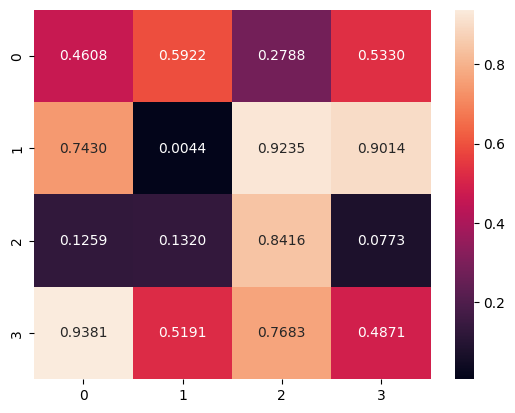

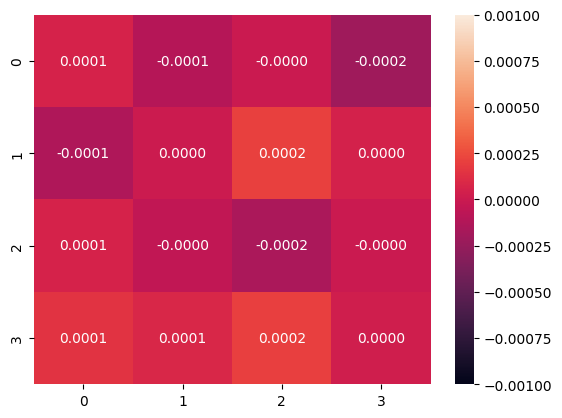

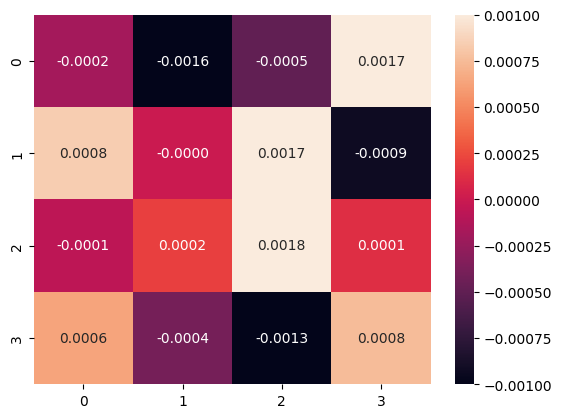

In [5]:
# plot matrix with values using sns
sns.heatmap(arrfp32, annot=True, fmt=".4f")
plt.show()
# plot difference between arrfp32 and arrfp16
sns.heatmap(arrfp32 - arrfp16, annot=True, fmt=".4f", vmin=-0.001, vmax=0.001)
plt.show()
# plot the difference between fp32 and brain float 16
sns.heatmap(arrfp32 - arrbf16, annot=True, fmt=".4f", vmin=-0.001, vmax=0.001)
plt.show()

In [6]:
val = 1 / 3
tensor_fp64 = torch.tensor(val, dtype=torch.float64)
print(f"fp64: {format(tensor_fp64.item(), '.30f')}")
tensor_fp32 = torch.tensor(val, dtype=torch.float32)
print(f"fp32: {format(tensor_fp32.item(), '.30f')}")
tensor_fp16 = torch.tensor(val, dtype=torch.float16)
print(f"fp16: {format(tensor_fp16.item(), '.30f')}")
tensor_bf16 = torch.tensor(val, dtype=torch.bfloat16)
print(f"bf16: {format(tensor_bf16.item(), '.30f')}")

fp64: 0.333333333333333314829616256247
fp32: 0.333333343267440795898437500000
fp16: 0.333251953125000000000000000000
bf16: 0.333984375000000000000000000000


In [7]:
model_fp32 = SimpleModel()
model_fp32.apply(initialize_weights)

SimpleModel(
  (embedding_layer): Embedding(2, 2)
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (norm1): LayerNorm((4,), eps=1e-05, elementwise_affine=True)
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (norm2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (output_layer): Linear(in_features=2, out_features=2, bias=True)
)

In [8]:
model_fp32

SimpleModel(
  (embedding_layer): Embedding(2, 2)
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (norm1): LayerNorm((4,), eps=1e-05, elementwise_affine=True)
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (norm2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (output_layer): Linear(in_features=2, out_features=2, bias=True)
)

In [9]:
def print_param_dtype(model_fp32):
    for name, param in model_fp32.named_parameters():
        print(f"{name} is loaded in {param.dtype}")

In [10]:
print_param_dtype(model_fp32)

embedding_layer.weight is loaded in torch.float32
fc1.weight is loaded in torch.float32
fc1.bias is loaded in torch.float32
norm1.weight is loaded in torch.float32
norm1.bias is loaded in torch.float32
fc2.weight is loaded in torch.float32
fc2.bias is loaded in torch.float32
norm2.weight is loaded in torch.float32
norm2.bias is loaded in torch.float32
output_layer.weight is loaded in torch.float32
output_layer.bias is loaded in torch.float32


In [11]:
model_fp16 = deepcopy(model_fp32)
model_fp16 = model_fp16.half()
print_param_dtype(model_fp16)

embedding_layer.weight is loaded in torch.float16
fc1.weight is loaded in torch.float16
fc1.bias is loaded in torch.float16
norm1.weight is loaded in torch.float16
norm1.bias is loaded in torch.float16
fc2.weight is loaded in torch.float16
fc2.bias is loaded in torch.float16
norm2.weight is loaded in torch.float16
norm2.bias is loaded in torch.float16
output_layer.weight is loaded in torch.float16
output_layer.bias is loaded in torch.float16


In [12]:
# convert model to bfloat16
model_bf16 = deepcopy(model_fp32)
model_bf16 = model_bf16.to(torch.bfloat16)
print_param_dtype(model_bf16)

embedding_layer.weight is loaded in torch.bfloat16
fc1.weight is loaded in torch.bfloat16
fc1.bias is loaded in torch.bfloat16
norm1.weight is loaded in torch.bfloat16
norm1.bias is loaded in torch.bfloat16
fc2.weight is loaded in torch.bfloat16
fc2.bias is loaded in torch.bfloat16
norm2.weight is loaded in torch.bfloat16
norm2.bias is loaded in torch.bfloat16
output_layer.weight is loaded in torch.bfloat16
output_layer.bias is loaded in torch.bfloat16


In [13]:
test_input = torch.LongTensor([[1, 0], [0, 1]])
logits_fp32 = model_fp32(test_input)
logits_fp16 = model_fp16(test_input)
logits_bf16 = model_bf16(test_input)

mean_diff = torch.abs(logits_fp16 - logits_fp32).mean().item()
max_diff = torch.abs(logits_fp16 - logits_fp32).max().item()
print(f"Mean diff: {mean_diff} | Max diff: {max_diff}")

mean_diff = torch.abs(logits_bf16 - logits_fp32).mean().item()
max_diff = torch.abs(logits_bf16 - logits_fp32).max().item()

print(f"Mean diff: {mean_diff} | Max diff: {max_diff}")

Mean diff: 0.00021785497665405273 | Max diff: 0.00022172927856445312
Mean diff: 0.003903329372406006 | Max diff: 0.007592678070068359


In [14]:
# total parameters in the model
sum(p.numel() for p in model_fp32.parameters())

44

In [15]:
from transformers import BlipForConditionalGeneration

model_name = "Salesforce/blip-image-captioning-base"
model_fp32 = BlipForConditionalGeneration.from_pretrained(model_name)

In [16]:
fp32_mem_footprint = model_fp32.get_memory_footprint()
print("Footprint of the fp32 model in MBs: ", fp32_mem_footprint / 1e6)

Footprint of the fp32 model in MBs:  989.6604


In [17]:
model_bf16 = BlipForConditionalGeneration.from_pretrained(
    model_name, torch_dtype=torch.bfloat16
)
bf16_mem_footprint = model_bf16.get_memory_footprint()
relative_diff = bf16_mem_footprint / fp32_mem_footprint

print("Footprint of the bf16 model in MBs: ", bf16_mem_footprint / 1e6)
print(f"Relative diff: {relative_diff}")

Footprint of the bf16 model in MBs:  494.832248
Relative diff: 0.5000020693967345


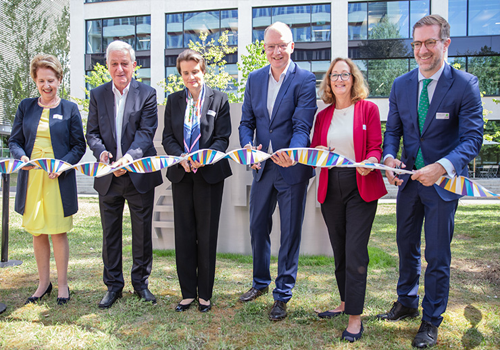

In [18]:
pic_url = "https://www.fmi.ch/img/homepage/240823_Opening_Biondo.jpg"
image = fetch_image(pic_url)
display(image.resize((500, 350)))

In [19]:
from transformers import BlipProcessor

processor = BlipProcessor.from_pretrained(model_name)
results_fp32 = generate_output(model_fp32, processor, image, torch.float32)
print("fp32 Model Results:\n", results_fp32)

/home/pavel/miniforge3/envs/try_tests/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


fp32 Model Results:
 a group of people cutting a ribbon in front of a building


In [20]:
# results_bf16 = generate_output(model_bf16, processor, image, torch.bfloat16)
# print("fp32 Model Results:\n", results_bf16)

# Quantization to INT8

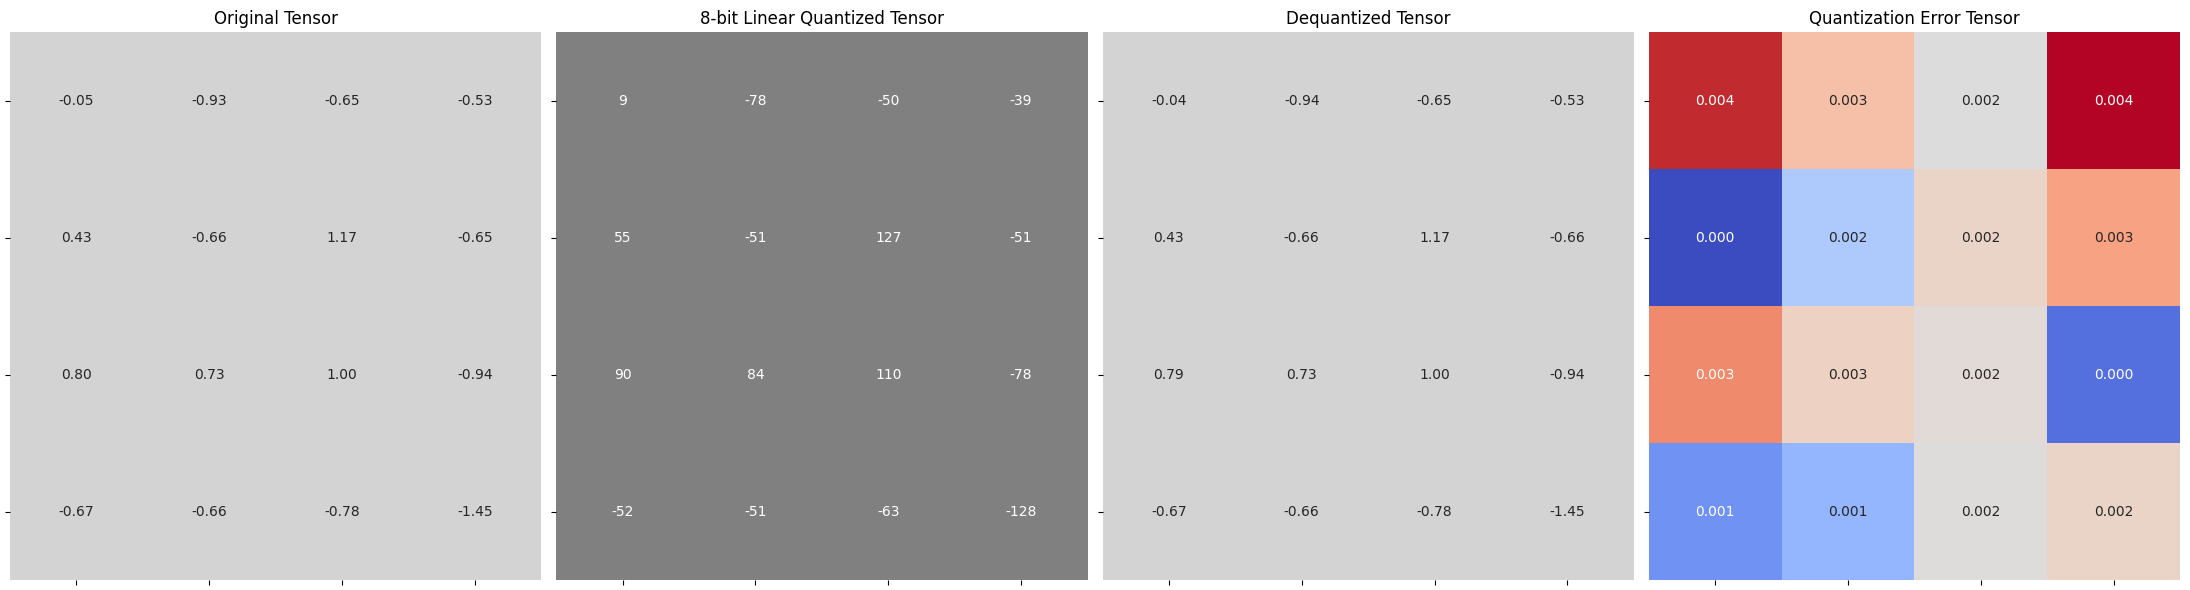

tensor(6.7447e-06)

In [21]:
# random torch tensor with fp32 and size 3x3 with values between -1000 and 1000
original_tensor = torch.randn((4, 4))
scaling, offset = get_q_scale_and_zero_point(original_tensor)
quantized_tensor = linear_q_with_scale_and_zero_point(original_tensor, scaling, offset)
dequantized_tensor = linear_dequantization(quantized_tensor, scaling, offset)
plot_quantization_errors(original_tensor, quantized_tensor, dequantized_tensor)
(dequantized_tensor - original_tensor).square().mean()

In [22]:
original_tensor = torch.randn((1000, 1000))
scaling, offset = get_q_scale_and_zero_point(original_tensor)
quantized_tensor = linear_q_with_scale_and_zero_point(original_tensor, scaling, offset)
dequantized_tensor = linear_dequantization(quantized_tensor, scaling, offset)
mse_asym = (dequantized_tensor - original_tensor).square().mean()

quantized_tensor_sym, scaling_sym = linear_q_symmetric(original_tensor)
dequantized_tensor_sym = linear_dequantization(quantized_tensor_sym, scaling_sym, 0)
mse_sym = (dequantized_tensor_sym - original_tensor).square().mean()

In [23]:
print(f"MSE for asymmetric quantization: {mse_asym}")
print(f"MSE for symmetric quantization: {mse_sym}")

MSE for asymmetric quantization: 0.00012269736907910556
MSE for symmetric quantization: 0.00012419020640663803


### Test per quantization per matrix, per row and per group

In [24]:
test_tensor = torch.rand((64, 64)) * 1000
group_size = 16

In [25]:
quantized_tensor_per_matrix, scaling_per_matrix = linear_q_symmetric(test_tensor)
dequantized_tensor_per_matrix = linear_dequantization(
    quantized_tensor_per_matrix, scaling_per_matrix, 0
)

In [26]:
quantized_tensor_0, scale_0 = linear_q_symmetric_per_channel(test_tensor, dim=0)
dequantized_tensor_0 = linear_dequantization(quantized_tensor_0, scale_0, 0)

In [27]:
quantized_tensor_per_group, scaling_per_group = linear_q_symmetric_per_group(
    test_tensor, group_size=8
)

dequantized_tensor_per_group = linear_dequantization_per_group(
    quantized_tensor_per_group, scaling_per_group, group_size=8
)

In [28]:
# print 3 errors
mse_per_matrix = quantization_error(test_tensor, dequantized_tensor_per_matrix)
mse_per_channel = quantization_error(test_tensor, dequantized_tensor_0)
mse_per_group = quantization_error(test_tensor, dequantized_tensor_per_group)

print(f"MSE for per matrix quantization: {mse_per_matrix}")
print(f"MSE for per channel quantization: {mse_per_channel}")
print(f"MSE for per group quantization: {mse_per_group}")

MSE for per matrix quantization: 5.053423881530762
MSE for per channel quantization: 4.904552936553955
MSE for per group quantization: 3.578951358795166


In [29]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests

model_name = "facebook/detr-resnet-50"
# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained(model_name, revision="no_timm")
model = DetrForObjectDetection.from_pretrained(model_name, revision="no_timm")

original_memory_footprint = model.get_memory_footprint()
print("Footprint of the model in MBs: ", original_memory_footprint / 1e6)

Footprint of the model in MBs:  166.524032


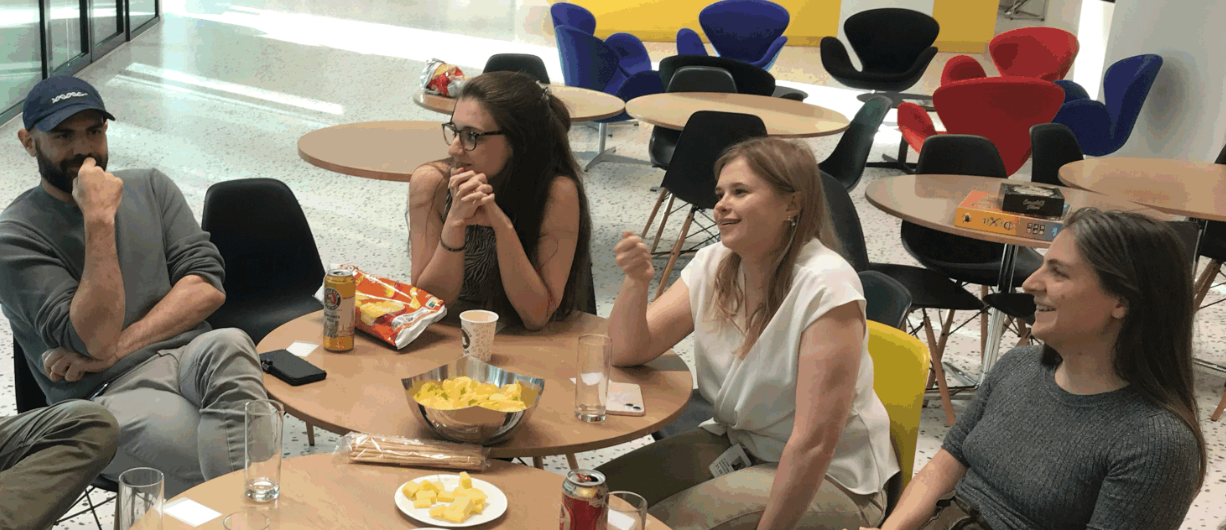

In [30]:
img_path = "images/pic2.png"
image = Image.open(img_path).convert("RGB")
image

In [31]:
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs, target_sizes=target_sizes, threshold=0.95
)[0]

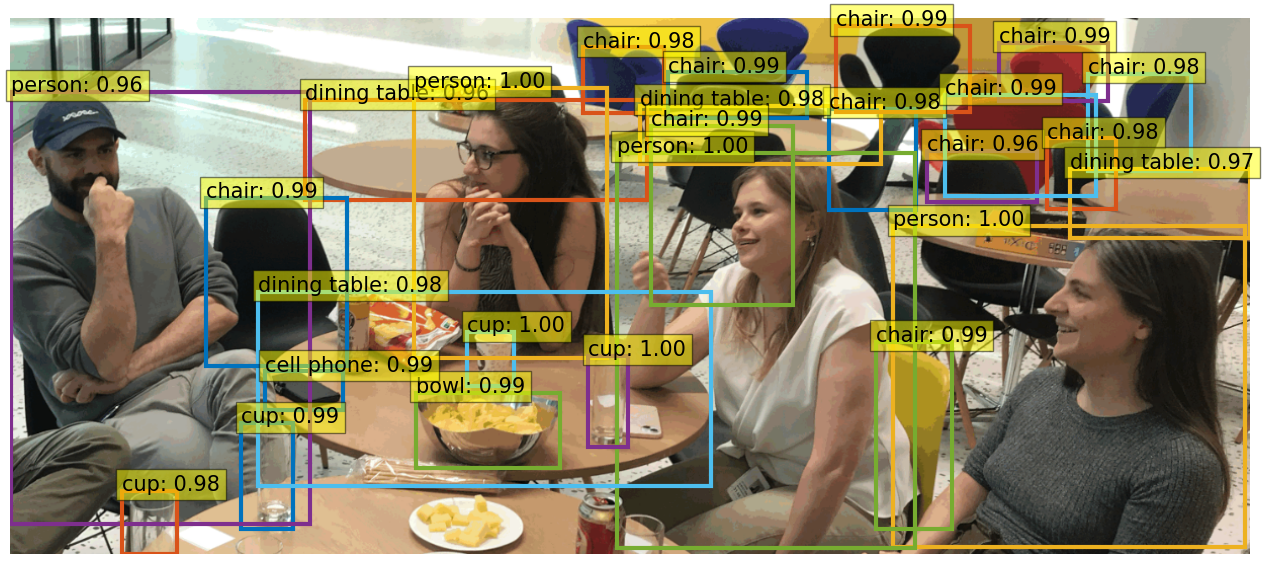

In [32]:
plot_results(model, image, results)

In [33]:
model_fp16 = deepcopy(model).half()
fp16_memory_footprint = model_fp16.get_memory_footprint()
print("Footprint of the fp16 model in MBs: ", fp16_memory_footprint / 1e6)

Footprint of the fp16 model in MBs:  83.262016


In [34]:
inputs = processor(images=image, return_tensors="pt")
inputs = {k: v.to(torch.float16) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model_fp16(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs, target_sizes=target_sizes, threshold=0.95
)[0]

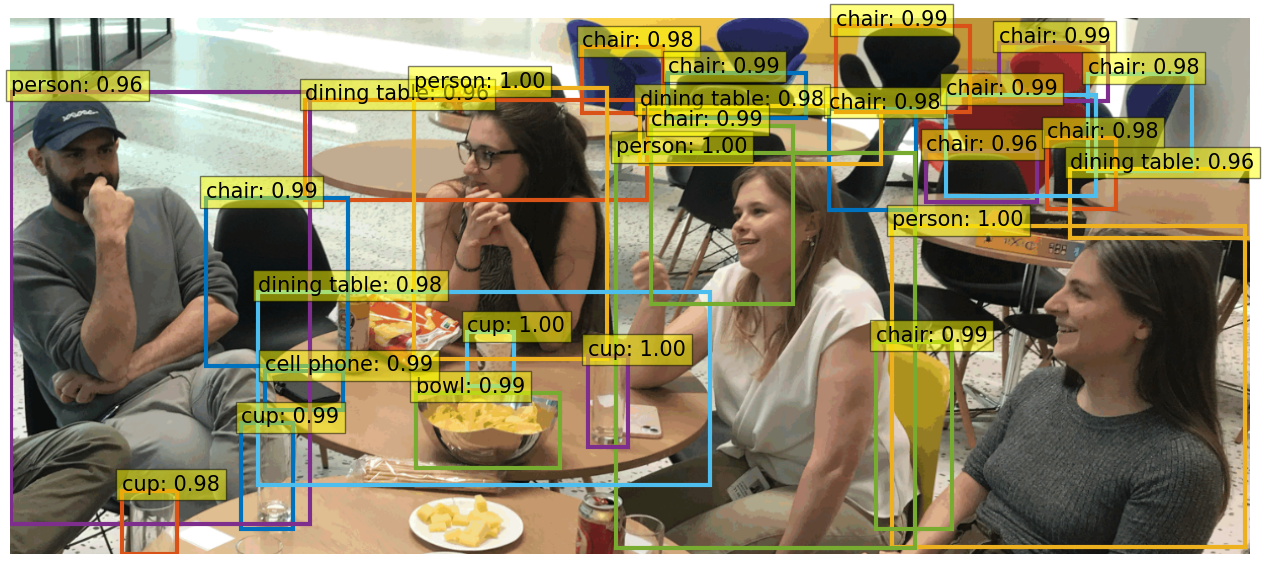

In [35]:
plot_results(model_fp16, image, results)

Footprint of the quantized fp16 model in MBs:  66.084992


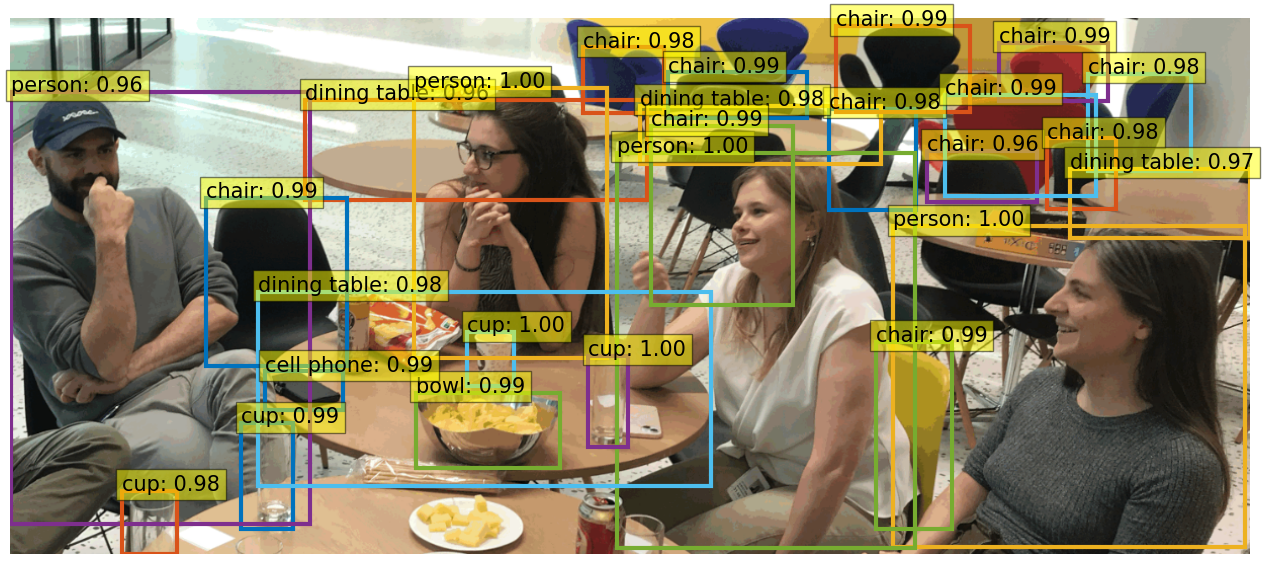

In [38]:
quantized_model = deepcopy(model).to(torch.float16)
replace_linear_with_target_and_quantize(quantized_model)

inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs, target_sizes=target_sizes, threshold=0.95
)[0]

quantized_memory_footprint = quantized_model.get_memory_footprint()
print(
    "Footprint of the quantized fp16 model in MBs: ", quantized_memory_footprint / 1e6
)

plot_results(quantized_model, image, results)

In [39]:
quantized_memory_footprint / original_memory_footprint

0.39684957904454293

Footprint of the quantized fp16 model in MBs:  42.213568


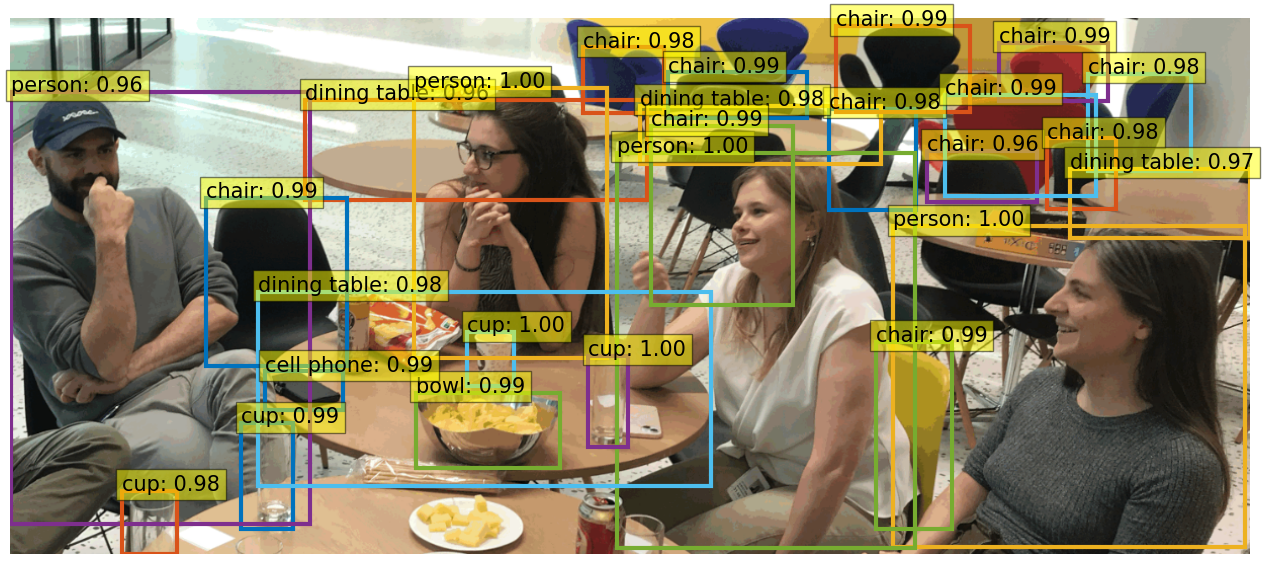

In [43]:
fully_quantized_model = deepcopy(quantized_model)
replace_conv2d_with_quantized(fully_quantized_model)

inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs, target_sizes=target_sizes, threshold=0.95
)[0]

fully_quantized_memory_footprint = fully_quantized_model.get_memory_footprint()
print(
    "Footprint of the quantized fp16 model in MBs: ",
    fully_quantized_memory_footprint / 1e6,
)

plot_results(fully_quantized_model, image, results)

In [44]:
fully_quantized_memory_footprint / original_memory_footprint

0.25349835391927095